Business Case: **Aerofit**


**About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

Downloading the dataset

In [ ]:
! gdown 1YzcEnPQzFchTbYr7DvlV_hQo6R8wuPlB

Downloading...
From: https://drive.google.com/uc?id=1YzcEnPQzFchTbYr7DvlV_hQo6R8wuPlB
To: /content/Aerofit.csv
100% 7.28k/7.28k [00:00<00:00, 20.7MB/s]


Importing necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading the data

In [ ]:
df = pd.read_csv('Aerofit.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Analysing basic metrics of the data like shape,data types of the attributes,checking for nulls and duplicates

In [ ]:
df.shape

(180, 9)

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.Product.value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
df.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
df.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [ ]:
df.loc[df.duplicated()]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


In [ ]:
nulls = df.isnull().sum()
nulls

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Non-Visual Analysis**

The number of different treadmills purchased based on Gender

In [ ]:
temp = df.groupby(['Product','Gender']).count().reset_index()
temp.rename(columns = {'Age':'Count'},inplace=True)
temp.iloc[:,:3]

,Product,Gender,Count
0,KP281,Female,40
1,KP281,Male,40
2,KP481,Female,29
3,KP481,Male,31
4,KP781,Female,7
5,KP781,Male,33


Modifying the data

*  In order to include the prices in the dataframe as well, temporary dataframe
'pricing' is created & then we merge the original dataframe and pricing dataframe.







In [ ]:
pricing = pd.DataFrame({
 "Product":["KP281","KP481","KP781"],
 "Product_pricing":[1500,1750,2500]
 })

pricing

,Product,Product_pricing
0,KP281,1500
1,KP481,1750
2,KP781,2500


In [ ]:
df=df.merge(pricing, on='Product',how='left')


Creating a new column for deeper Analysis

In [ ]:
df['Miles_per_use'] = df['Miles']/df['Usage']

Conversion of Numerical data to Categorical data for better analysis

*  We converted Fitness rating into 5 categories ranging from Poor to Excellent.





In [ ]:
df['Fitness_level'] = df['Fitness']

In [ ]:
df["Fitness_level"].replace({1:"Poor", 2:"Mediocre", 3:"Average",4:"Good", 5:"Excellent"},inplace=True)
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Product_pricing,Miles_per_use,Fitness_level
0,KP281,18,Male,14,Single,3,4,29562,112,1500,37.333333,Good
1,KP281,19,Male,15,Single,2,3,31836,75,1500,37.500000,Average
2,KP281,19,Female,14,Partnered,4,3,30699,66,1500,16.500000,Average
3,KP281,19,Male,12,Single,3,3,32973,85,1500,28.333333,Average
4,KP281,20,Male,13,Partnered,4,2,35247,47,1500,11.750000,Mediocre
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,2500,33.333333,Excellent
176,KP781,42,Male,18,Single,5,4,89641,200,2500,40.000000,Good
177,KP781,45,Male,16,Single,5,5,90886,160,2500,32.000000,Excellent
178,KP781,47,Male,18,Partnered,4,5,104581,120,2500,30.000000,Excellent


Statistical Summary after modification of the Dataframe

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles,Product_pricing,Miles_per_use
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,1805.555556,29.412341
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,387.978895,9.229772
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,1500.000000,10.500000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,1500.000000,23.500000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,1750.000000,28.333333
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,1750.000000,33.000000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,2500.000000,90.000000


**Insights from Visual Analysis**

1.   Highest sold product is KP281
2.   Ratio of Male to Female customers is 57%-43%
3.   Average Income is 53,719$
4.   Average Age of the Customers is 28.7
5.   Mean usage of a treadmill in a week is 3.45 times
6.   Weekly average miles covered is 29.4








**VISUAL ANALYSIS**

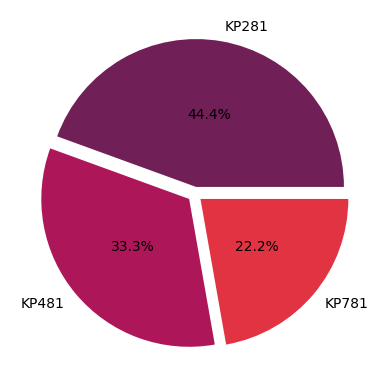

In [ ]:
colors = sns.color_palette('rocket')[1:4]
plt.pie(df.Product.value_counts(),labels = df.Product.value_counts().index,colors=colors,autopct="%.1f%%", explode=[0.05]*3, pctdistance=0.5)
plt.show()

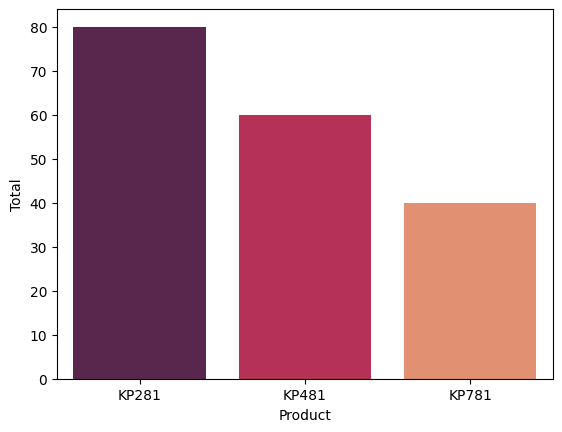

In [ ]:
temp = sns.countplot(data=df,x='Product',palette='rocket')
plt.ylabel('Total')
plt.show()

From the above graphs we can see the distribution of sales of the 3 products,
KP281 being the highest with 80 whereas KP781 being the lowest with 40.

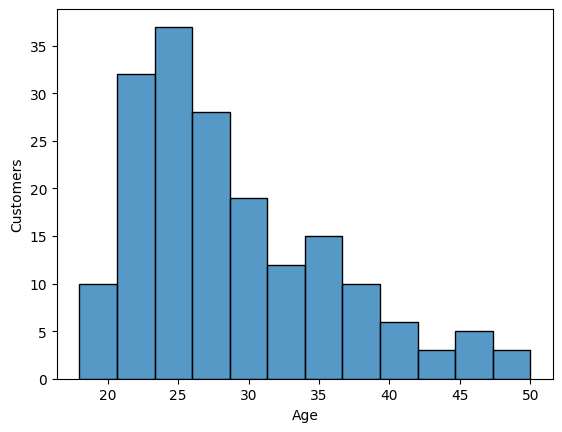

In [ ]:
sns.histplot(df['Age'],bins=12)
plt.ylabel('Customers')
plt.show()

Age distibution of the Customers

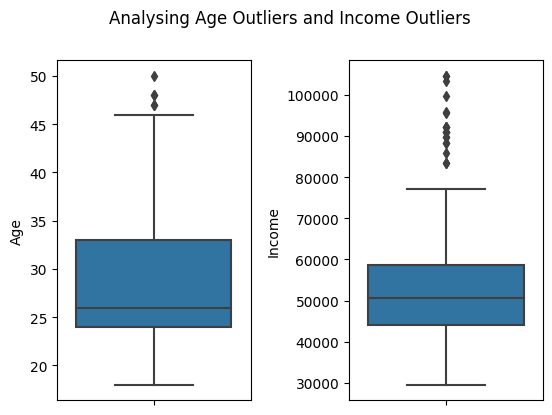

In [ ]:
fig , ax = plt.subplots(1,2)
fig.tight_layout(pad=4.0)

sns.boxplot(y=df.Age,ax=ax[0])
sns.boxplot(y=df.Income,ax=ax[1])
plt.suptitle("Analysing Age Outliers and Income Outliers")
plt.show()

Created a subplot plotting two boxplots in order to analyse the outliers.

In [ ]:
q3 = np.percentile(df.Age,75)
q1 = np.percentile(df.Age,25)
IQR = q3-q1

Outliers = df.Age > q3 + (1.5*(IQR))
Outliers.value_counts()

False    175
True       5
Name: Age, dtype: int64

In [ ]:
q3 = np.percentile(df.Income,75)
q1 = np.percentile(df.Income,25)
IQR = q3-q1

Outliers = df.Income > q3 + (1.5*(IQR))
Outliers.value_counts()

False    161
True      19
Name: Income, dtype: int64

After plotting the graphs we calculate the exact number of outliers for Age as well as Income

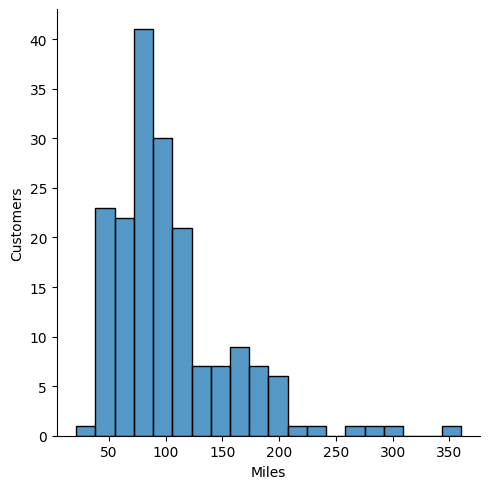

In [ ]:
sns.displot(df.Miles)
plt.ylabel('Customers')
plt.show()

Distribution of weekly miles walked by the customers

**Bi-Variate Analysis**

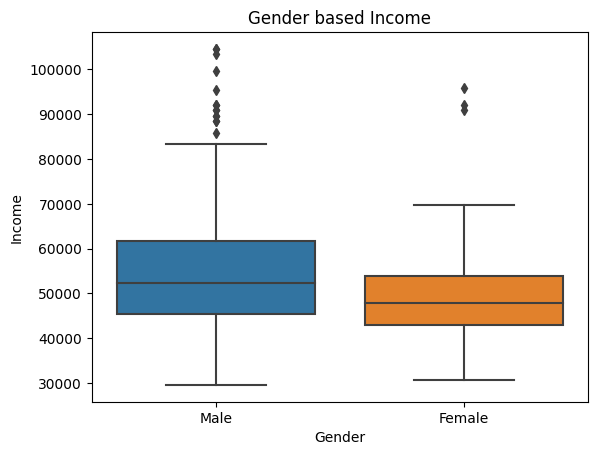

In [ ]:

plt.xlabel("Gender")
plt.ylabel("Income")
sns.boxplot(x= 'Gender', y='Income', data=df)
plt.title("Gender based Income")
plt.show()

Comparisons of Income based on Gender through Box-plots

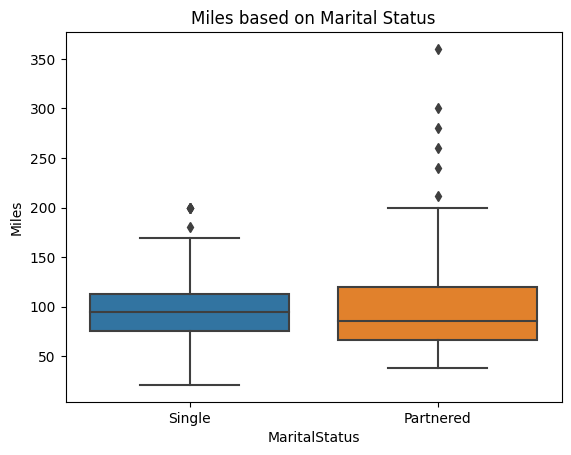

In [ ]:
plt.xlabel("Gender")
plt.ylabel("Income")
x=sns.boxplot(x= 'MaritalStatus', y='Miles', data=df)
plt.title("Miles based on Marital Status")
plt.show()


Comparisons of Weekly Miles walked based on Marital Status through Box-plots

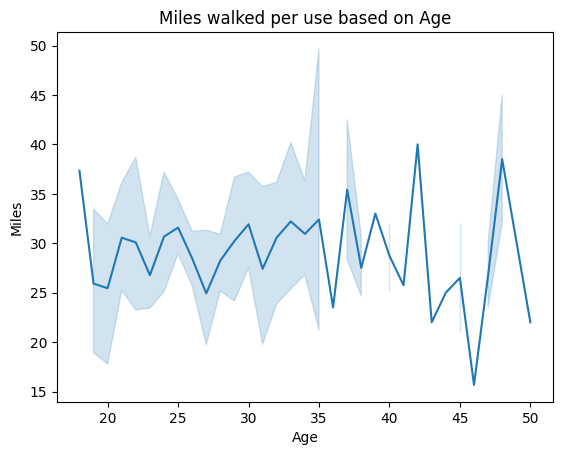

In [ ]:
plt.xlabel("Age")
plt.ylabel("Miles")
x=sns.lineplot(data=df,x= 'Age', y='Miles_per_use')
plt.title("Miles walked per use based on Age")
plt.show()

Distribution of miles walked per use of a treadmill based on Age

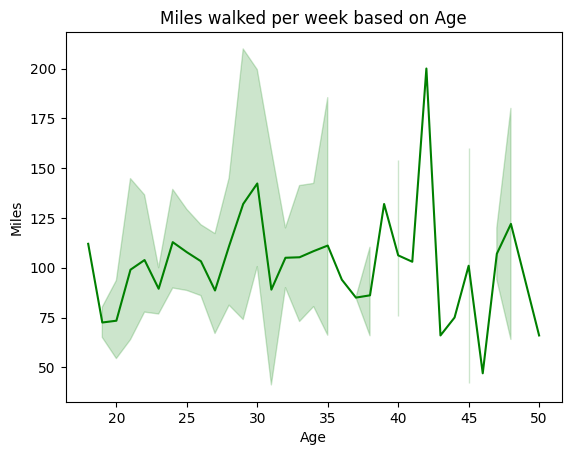

In [ ]:
plt.xlabel("Age")
plt.ylabel("Miles")
x=sns.lineplot(data=df,x= 'Age', y='Miles',color = 'Green')
plt.title("Miles walked per week based on Age")
plt.show()

Distribution of miles walked per week on a treadmill based on Age

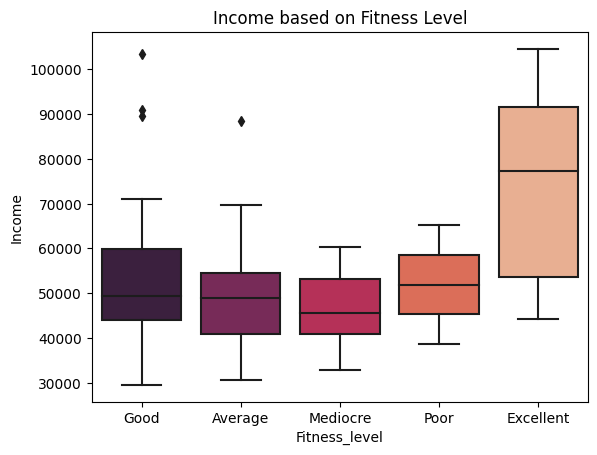

In [ ]:
plt.xlabel("Income")
plt.ylabel("Fitness Level")
x=sns.boxplot(data=df,x= 'Fitness_level', y='Income',palette='rocket')
plt.title("Income based on Fitness Level")
plt.show()

Created a relationship between income and Fitness Levels

<ipython-input-34-3ad7525823fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

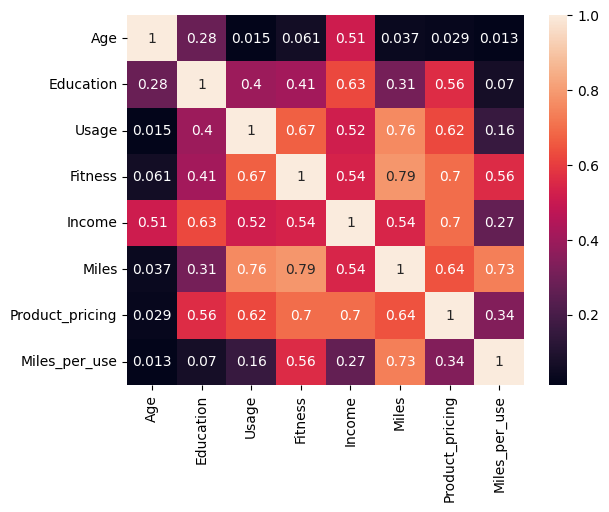

In [ ]:
correlation = df.corr()

sns.heatmap(correlation,annot=True)


Correlation between all the attributes is displayed

Prior to this we dug deep into customer analysis, moving on we will deep dive into analysing the product with our customer analysis as well as calculating marginal probabilities.

In [ ]:
revenue = df.groupby('Product')['Product_pricing'].sum().reset_index()
revenue

,Product,Product_pricing
0,KP281,120000
1,KP481,105000
2,KP781,100000


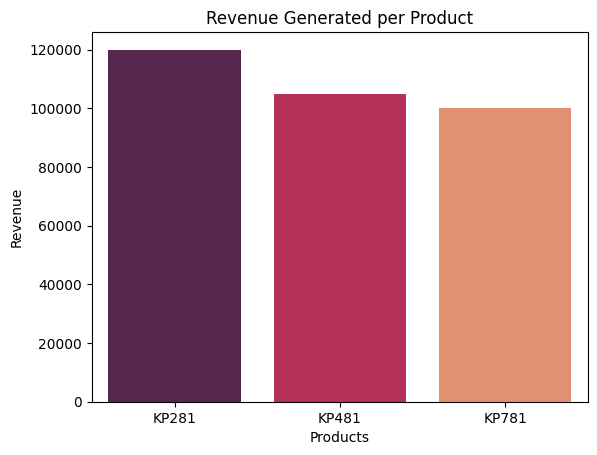

In [ ]:

x=sns.barplot(data=revenue,x='Product',y='Product_pricing',palette='rocket')
plt.title("Revenue Generated per Product")
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.show()

Calculated the revenue generated by each product in total and then plotted a bar graph

In [ ]:
pd.crosstab(df.Product,df.Gender,margins = True,normalize = True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


Calculated Marginal Probability of a particular gender buying a certain product



In [ ]:
pd.crosstab(df.Product,df.MaritalStatus,margins = True,normalize=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.266667,0.177778,0.444444
KP481,0.200000,0.133333,0.333333
KP781,0.127778,0.094444,0.222222
All,0.594444,0.405556,1.000000


In [ ]:
pd.crosstab(df.Product,[df.Gender,df.MaritalStatus],margins = True,normalize=True).reset_index()

Gender        Product    Female                Male                 All
MaritalStatus         Partnered    Single Partnered    Single          
0               KP281  0.150000  0.072222  0.116667  0.105556  0.444444
1               KP481  0.083333  0.077778  0.116667  0.055556  0.333333
2               KP781  0.022222  0.016667  0.105556  0.077778  0.222222
3                 All  0.255556  0.166667  0.338889  0.238889  1.000000

<ipython-input-40-3d2cf8fe8695>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x= x.drop('All',axis=1)


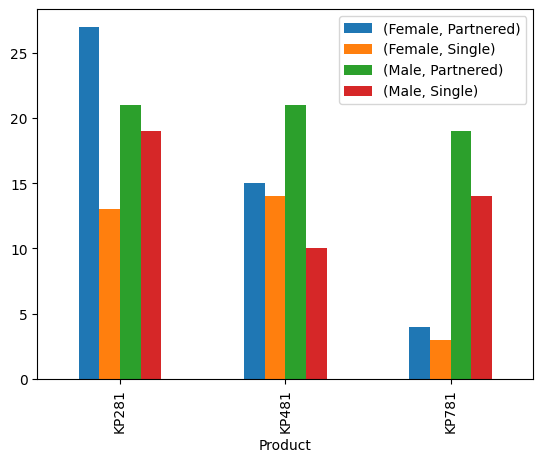

In [ ]:
x= pd.crosstab(df.Product,[df.Gender,df.MaritalStatus],margins = True)
x= x.drop('All',axis=1)
x= x.drop('All',axis=0)
x.plot(kind='bar')
plt.legend()
plt.show()

In the above graph we see the product distribution based on Gender as well as Marital Status.



In [ ]:
pd.crosstab(df.Product,df.Usage,margins=True,normalize=True)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.105556,0.205556,0.122222,0.011111,0.000000,0.000000,0.444444
KP481,0.077778,0.172222,0.066667,0.016667,0.000000,0.000000,0.333333
KP781,0.000000,0.005556,0.100000,0.066667,0.038889,0.011111,0.222222
All,0.183333,0.383333,0.288889,0.094444,0.038889,0.011111,1.000000


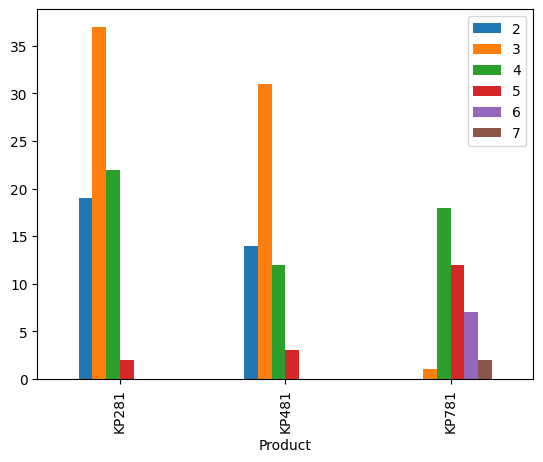

In [ ]:
y= pd.crosstab(df.Product,df.Usage,margins=True)
y= y.drop('All',axis=1)
y= y.drop('All',axis=0)
y.plot(kind='bar')
plt.legend()
plt.show()

Above graph shows us how each product was picked by the customer based on the customer's usage per week

In [ ]:
pd.crosstab(df.Education,df.Product,margins=True,normalize=True)


Product,KP281,KP481,KP781,All
Education,,,,
12,0.011111,0.005556,0.000000,0.016667
13,0.016667,0.011111,0.000000,0.027778
14,0.166667,0.127778,0.011111,0.305556
15,0.022222,0.005556,0.000000,0.027778
16,0.216667,0.172222,0.083333,0.472222
18,0.011111,0.011111,0.105556,0.127778
20,0.000000,0.000000,0.005556,0.005556
21,0.000000,0.000000,0.016667,0.016667
All,0.444444,0.333333,0.222222,1.000000


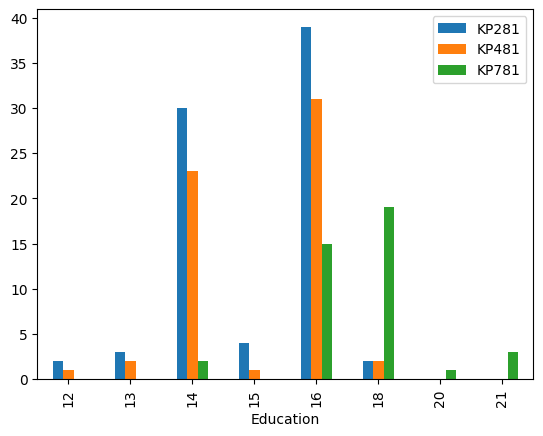

In [ ]:
a = pd.crosstab(df.Education,df.Product,margins=True)
a=a.drop('All',axis=1)
a=a.drop('All',axis=0)
a.plot(kind='bar')
plt.legend()
plt.show()


In order to get deeper analysis for customer profiling the above graphs shows us an analysis between education of a customer and the product.

In [ ]:
pd.crosstab(df.Fitness_level,df.Product,margins=True,normalize=True)

Product,KP281,KP481,KP781,All
Fitness_level,,,,
Average,0.300000,0.216667,0.022222,0.538889
Excellent,0.011111,0.000000,0.161111,0.172222
Good,0.050000,0.044444,0.038889,0.133333
Mediocre,0.077778,0.066667,0.000000,0.144444
Poor,0.005556,0.005556,0.000000,0.011111
All,0.444444,0.333333,0.222222,1.000000


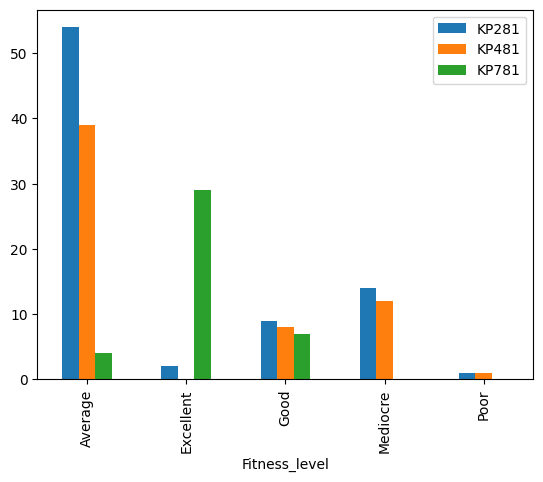

In [ ]:
z= pd.crosstab(df.Fitness_level,df.Product,margins=True)
z=z.drop('All',axis=1)
z=z.drop('All',axis=0)
z.plot(kind='bar')
plt.legend()
plt.show()

What we have done here is seen the analysis of the product based on the fitness levels mentioned by the customer.

**Multi-Variate Analysis**

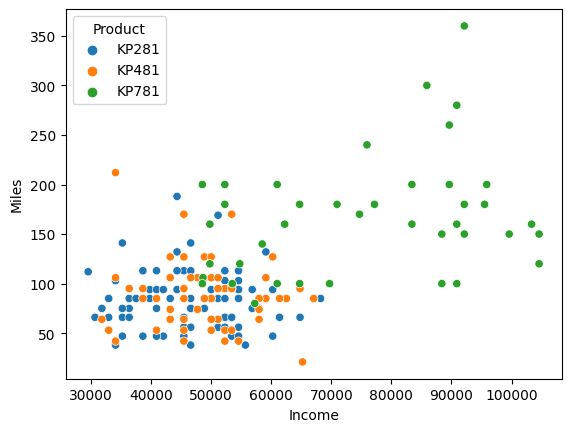

In [ ]:
sns.scatterplot(data=df,x='Income',y='Miles',hue='Product')
plt.show()


We see in the above graphs how customers with a certain income and a certain miles covered per week choose a specific product

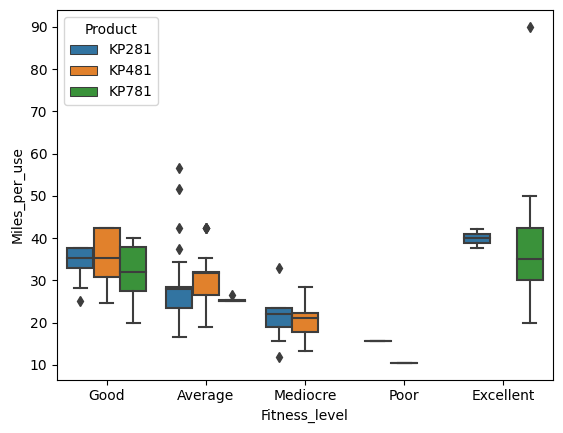

In [ ]:
sns.boxplot(data=df,x='Fitness_level',y='Miles_per_use',hue='Product')
plt.show()

The above graph helps us analyse product choices based on a customers Fitness level and Miles covered per use.

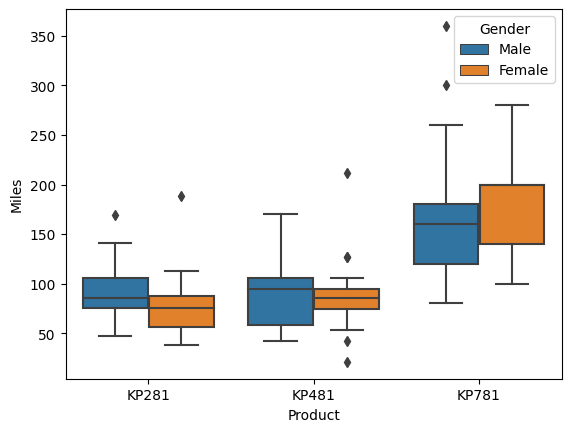

In [ ]:
sns.boxplot(data=df,y='Miles',x='Product',hue='Gender')
plt.show()

Final Multi-variate analysis helps us understand Gender comparison based on  Miles covered per week for each product

In [ ]:
sns.pairplot(df)
plt.show()

Plotted a pairplot showing multiple variable comparison

**CUSTOMER PROFILING**

Based on the non-visual analysis as well as visual analysis as performed above the following customer profiles are created per product to help Aerofit increase sales with better insights on profiling

**KP 281**



*   It is the highest selling product out of the three (80) Constitutes 44.4% out of total products sold

*   Despite being the cheapest product out of the three (1500$)it brings in highest revenue (120,000$)

*   Percentage of either a Male or Female customer buying KP281 is the same 22%

*   KP 281 does fairly well with a partnered or single customer irrespective of their gender

*   This particular treadmill is picked by those customers with a usage ranging from 2-4 times a week

*   Widely popular treadmill with customers having education ranging from 14-16 years

*   Customers with 'Average' or 'Mediocre' fitness levels majorly opt for this product

*   Being the cheapest product this is widely popular with customers income ranging between (30k-55k$)

*   Weekly miles walked on this treadmill would be 70-100







**KP 481**



*   Second highest sold product (60), it forms 33.3% of the total products sold.

*   With a median pricing of 1750$ it brings in a revenue of 105,000 dollars

*   Percentage of Male Customers is one percent greater then percentage of Female customers for this product

*   Most popular among Partnered Males

*   Similar to KP281, it is popular with customers having a education range between 14-16

*   Being a median priced treadmill customers with slightly higher income tend to go for this as well (30k-65k)

*   Customers with 'Average' - 'Good' fitness level tend to opt for this product as well as customers with slightly higher weekly usage (3-5 times)

*   Weekly miles walked on this treadmill would be 90-120






**KP 781**



*   Least sold product (40) constituting 22.2% of total products sold.

*   Being the costliest product 2500$ and despite it having the least sales it brings in a revenue of 100,000 dollars almost matching the KP481 revenue.

*   The KP781 product is widely popular among Males (0.18),female customers are close to negligible for this product (0.03)

*   This is a product that is mainly bought bys customers who are quite serious regarding their fitness and are seasoned, avg weekly use for these customers ranges from 4-7

*   Customers with 'Good' & 'Excellent' Fitness levels majorly tend to buy this product.

*   Being on the expensive side customers who have their income ranging from 50k-100k would go for this product

*   Weekly miles walked on this treadmill would be 150-200

*   Probability of a Customer with 'Poor' or 'Medicore' fitness levels is 0.

